In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

plt.rcParams['figure.figsize'] = (10,6)
sns.set_style("whitegrid")


In [3]:
df = pd.read_csv("../data/Sample - Superstore.csv", encoding='latin1')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()
df.describe()


<class 'pandas.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   str    
 2   Order Date     9994 non-null   str    
 3   Ship Date      9994 non-null   str    
 4   Ship Mode      9994 non-null   str    
 5   Customer ID    9994 non-null   str    
 6   Customer Name  9994 non-null   str    
 7   Segment        9994 non-null   str    
 8   Country        9994 non-null   str    
 9   City           9994 non-null   str    
 10  State          9994 non-null   str    
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   str    
 13  Product ID     9994 non-null   str    
 14  Category       9994 non-null   str    
 15  Sub-Category   9994 non-null   str    
 16  Product Name   9994 non-null   str    
 17  Sales          9994 non-null   float64
 18  Quantity       9994

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Month_Name
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,November
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,November
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,June
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,October
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,October


In [6]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()
total_customers = df['Customer ID'].nunique()
profit_margin = (total_profit / total_sales) * 100

print("Total Sales:", round(total_sales,2))
print("Total Profit:", round(total_profit,2))
print("Total Orders:", total_orders)
print("Total Customers:", total_customers)
print("Profit Margin %:", round(profit_margin,2))


Total Sales: 2297200.86
Total Profit: 286397.02
Total Orders: 5009
Total Customers: 793
Profit Margin %: 12.47


In [7]:
monthly_sales = df.groupby(['Year','Month'])[['Sales','Profit']].sum().reset_index()
monthly_sales.head()


,Year,Month,Sales,Profit
0,2014,1,14236.895,2450.1907
1,2014,2,4519.892,862.3084
2,2014,3,55691.009,498.7299
3,2014,4,28295.345,3488.8352
4,2014,5,23648.287,2738.7096


In [8]:
category_sales = df.groupby('Category')[['Sales','Profit']].sum().reset_index()
category_sales


,Category,Sales,Profit
0,Furniture,741999.7953,18451.2728
1,Office Supplies,719047.0320,122490.8008
2,Technology,836154.0330,145454.9481


In [9]:
region_sales = df.groupby('Region')[['Sales','Profit']].sum().reset_index()
region_sales


,Region,Sales,Profit
0,Central,501239.8908,39706.3625
1,East,678781.2400,91522.7800
2,South,391721.9050,46749.4303
3,West,725457.8245,108418.4489


In [10]:
customer_summary = df.groupby('Customer ID')[['Sales','Profit']].sum().reset_index()
customer_summary.head()


,Customer ID,Sales,Profit
0,AA-10315,5563.560,-362.8825
1,AA-10375,1056.390,277.3824
2,AA-10480,1790.512,435.8274
3,AA-10645,5086.935,857.8033
4,AB-10015,886.156,129.3465


In [11]:
# Raw query timing
start = time.time()
df.groupby(['Year','Month'])['Sales'].sum()
raw_time = time.time() - start

# Aggregated query timing
start = time.time()
monthly_sales['Sales'].sum()
agg_time = time.time() - start

print("Raw Query Time:", raw_time)
print("Aggregated Query Time:", agg_time)
print("Performance Improvement:", round(((raw_time-agg_time)/raw_time)*100,2), "%")


Raw Query Time: 0.013993024826049805
Aggregated Query Time: 0.00299835205078125
Performance Improvement: 78.57 %


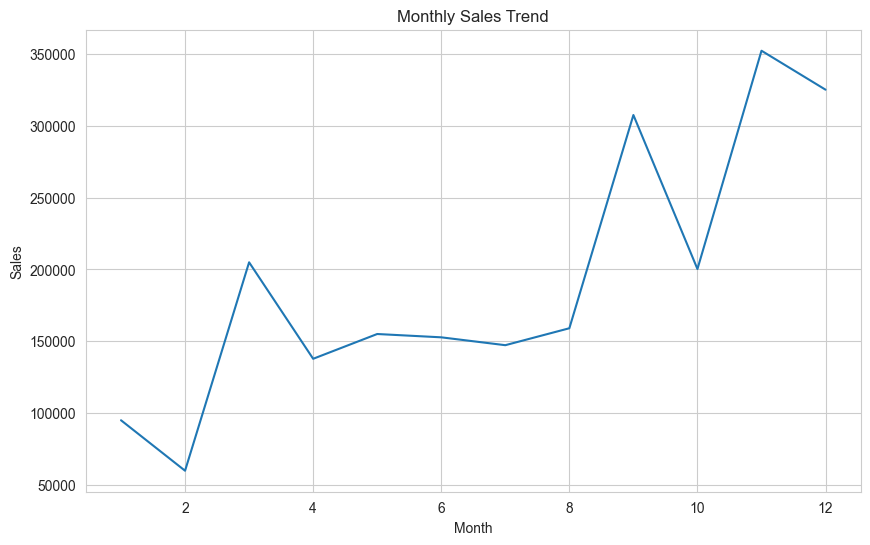

In [21]:
import os
os.makedirs('../images', exist_ok=True)

monthly_sales.groupby('Month')['Sales'].sum().plot(kind='line')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.savefig('../images/01_monthly_sales_trend.png', dpi=300, bbox_inches='tight')
plt.show()


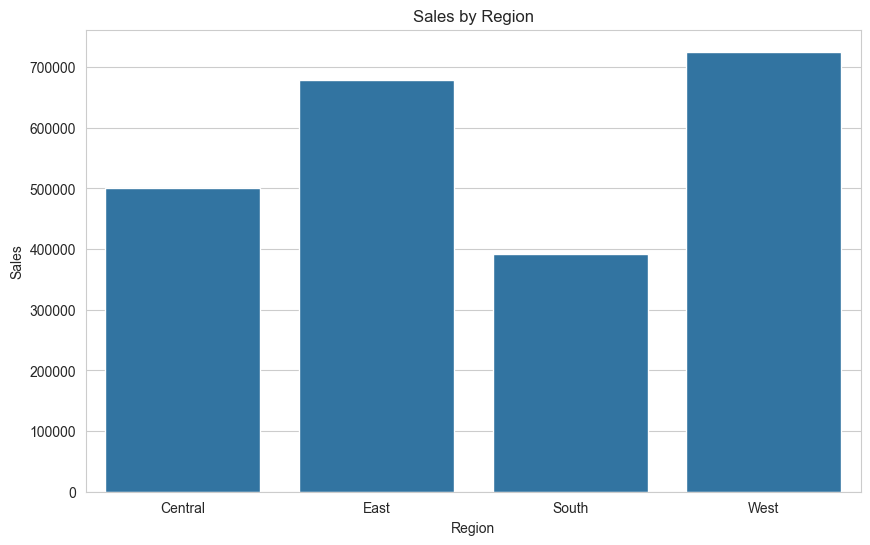

In [22]:
sns.barplot(data=region_sales, x='Region', y='Sales')
plt.title("Sales by Region")
plt.savefig('../images/02_sales_by_region.png', dpi=300, bbox_inches='tight')
plt.show()


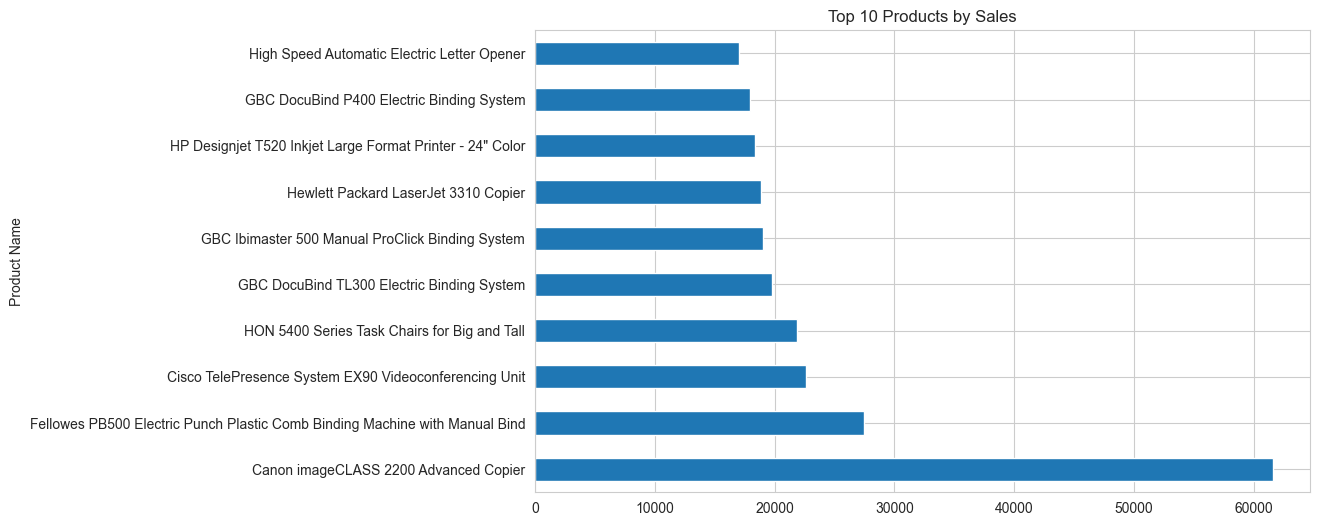

In [23]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh')
plt.title("Top 10 Products by Sales")
plt.savefig('../images/03_top_10_products.png', dpi=300, bbox_inches='tight')
plt.show()


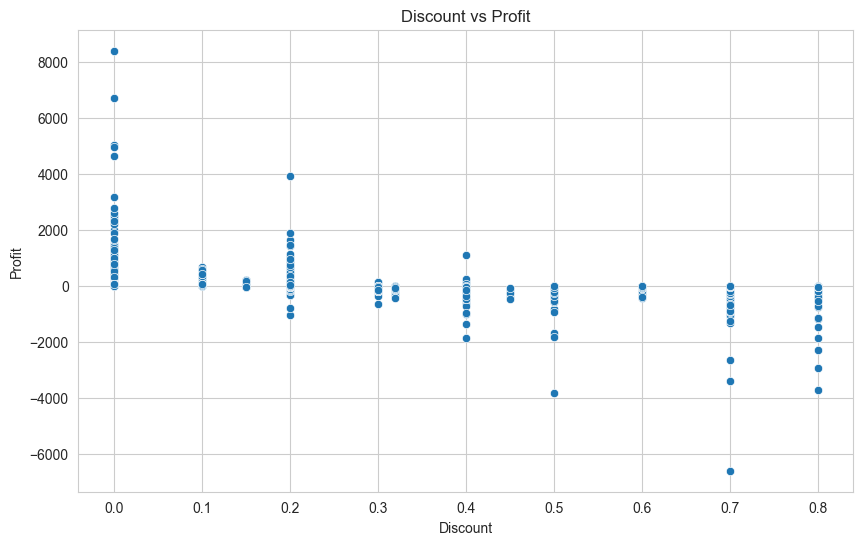

In [24]:
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title("Discount vs Profit")
plt.savefig('../images/04_discount_vs_profit.png', dpi=300, bbox_inches='tight')
plt.show()


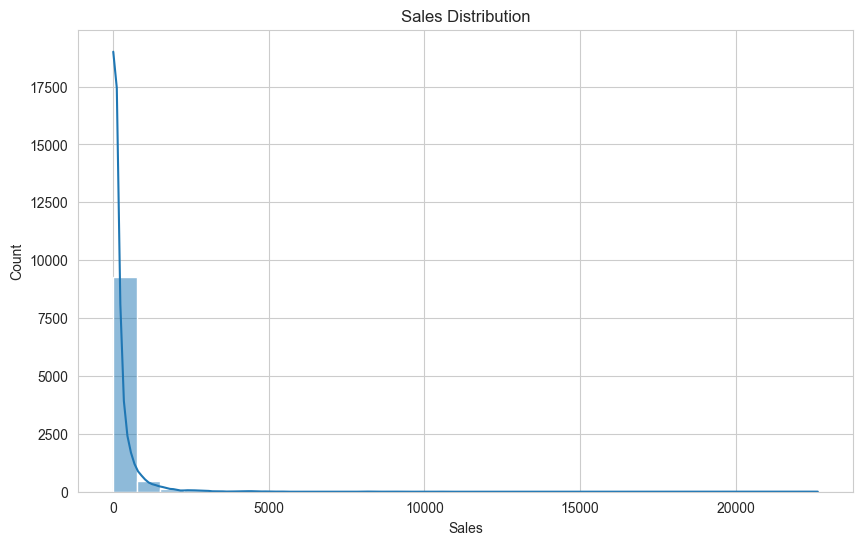

In [25]:
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title("Sales Distribution")
plt.savefig('../images/05_sales_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


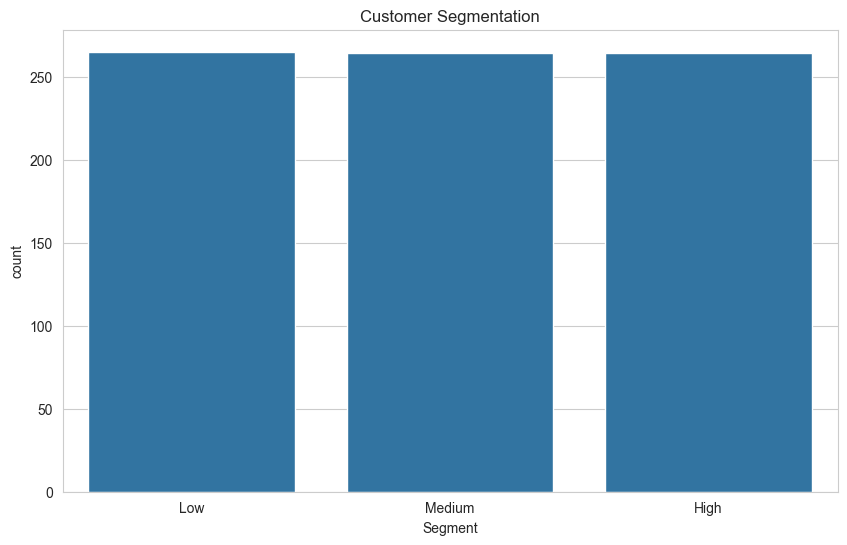

In [26]:
customer_summary['Segment'] = pd.qcut(customer_summary['Sales'], q=3, labels=["Low","Medium","High"])

sns.countplot(data=customer_summary, x='Segment')
plt.title("Customer Segmentation")
plt.savefig('../images/06_customer_segmentation.png', dpi=300, bbox_inches='tight')
plt.show()


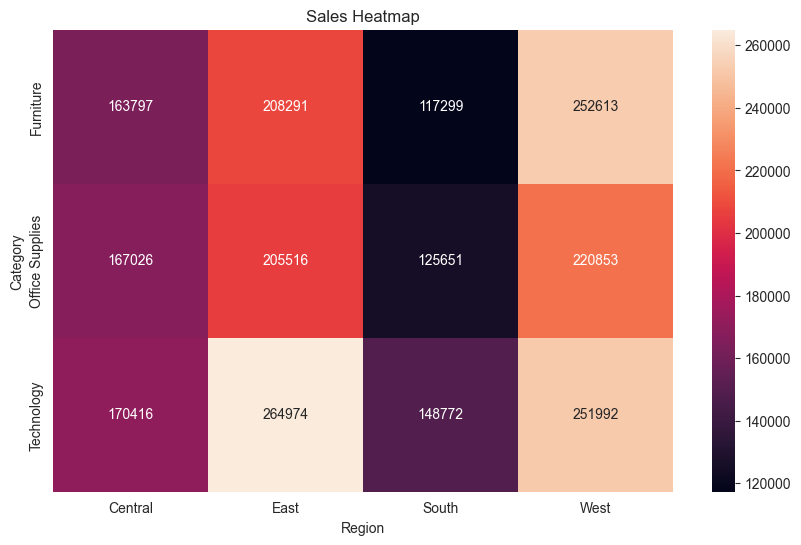

In [27]:
pivot_table = df.pivot_table(values='Sales', index='Category', columns='Region', aggfunc='sum')

sns.heatmap(pivot_table, annot=True, fmt=".0f")
plt.title("Sales Heatmap")
plt.savefig('../images/07_sales_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


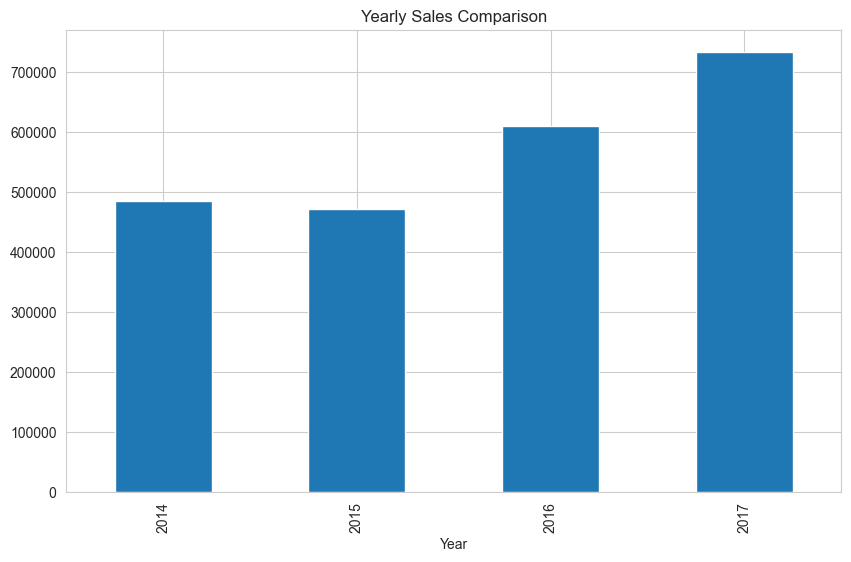

In [28]:
yearly_sales = df.groupby('Year')['Sales'].sum()

yearly_sales.plot(kind='bar')
plt.title("Yearly Sales Comparison")
plt.savefig('../images/08_yearly_sales.png', dpi=300, bbox_inches='tight')
plt.show()


In [20]:
df_big = pd.concat([df]*5, ignore_index=True)
print("New Size:", df_big.shape)


New Size: (49970, 24)
